Le temps de retard total d'un vol est la somme des retards liés à la météo(WeatherDelay), à la sécurité au sein de l'aéroport(SecurityDelay), à la compagnie (CarrierDelay) et au système de sécurité national (NASDelay).

- Les variables étudiées pour la prédiction du temps de retard lié à la météo sont: Température, Dew Point, Relative Humidity, Wind Speed, Precipitation, Precipation Cover, Visibility.
Des statistiques de ces differentes variables ont été effectuées dans ce notebook.
Les données météorologiques de l'année 2008 ont été obtenues dans un fichier csv et une jointure entre ce fichier csv et celui contenant les informations des vols (temps de retards,...) a été réalisé.

- La variable SecurityDelay est relative à l'aéroport de départ. Nous avons calculé la moyenne par mois et par aéroport et enregistré dans un fichier csv. 

- La variable CarrierDelay est relative à la compagnie aérienne. Nous avons calculé la moyenne par mois et par compagnie et enregistré dans un fichier csv.

- La variable NASDelay est relative au système National et varie par heure. Nous avons calculé la moyenne par heure et enregistré dans un fichier csv.

Les 3 précédentes variables enregistrées dans des fichiers csv seront utilisées pour la prédiction du temps total de retard.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
Le fichier 'Jointed_ficher_v1.csv' est le resultat de la jointure entre le fichier des données météorologiques et 
notre dataset initial contenant les informations des vols (temps de retards,...) 
'''
df = pd.read_csv('Jointed_ficher_v1.csv')

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,City,Hour,Start_Date,Temperature,Dew Point,Relative Humidity,Wind Speed,Precipitation,Precipitation Cover,Visibility
0,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
1,2008,1,3,4,1749.0,1705,1933.0,1844,EV,104.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
2,2008,1,3,4,2108.0,1740,2251.0,1930,9E,103.0,...,Indianapolis,17,2008-01-03 17:00:00,16.6,8.8,70.99,8.1,0.0,0.0,10.0
3,2008,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0
4,2008,1,3,4,1845.0,1841,1955.0,1931,NW,130.0,...,Indianapolis,18,2008-01-03 18:00:00,19.1,10.1,67.40,7.7,0.0,0.0,10.0


# Visualisation des variables météorologiques

count    1.110138e+06
mean     5.800348e+01
std      2.071913e+01
min     -1.400000e+01
25%      4.280000e+01
50%      6.030000e+01
75%      7.440000e+01
max      1.139000e+02
Name: Temperature, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E8C5B6E48>]],
      dtype=object)

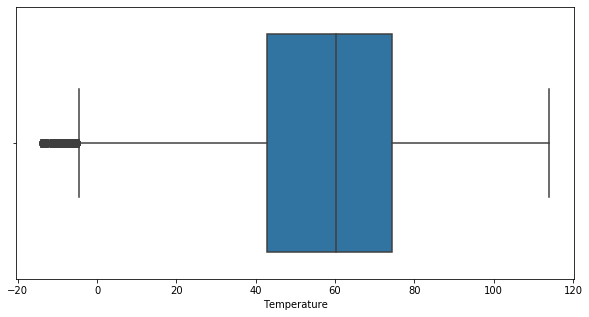

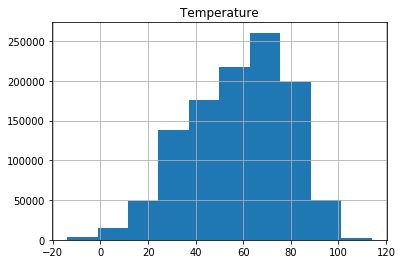

In [4]:
#L'unité de la variable Temperature est: Fahrenheit
print(df['Temperature'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='Temperature', data=df)
df.hist('Temperature')

count    1.110138e+06
mean     4.402162e+01
std      1.975920e+01
min     -2.390000e+01
25%      2.900000e+01
50%      4.660000e+01
75%      6.110000e+01
max      8.250000e+01
Name: Dew Point, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E91099518>]],
      dtype=object)

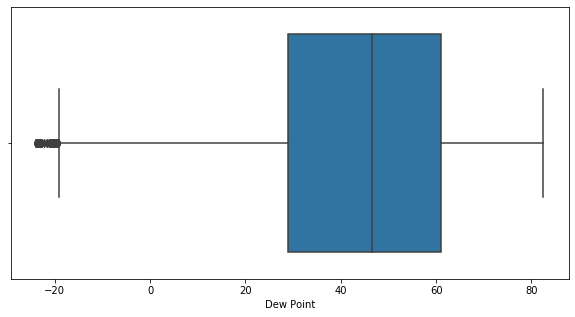

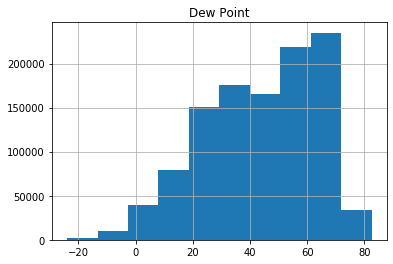

In [5]:
#L'unité de la variable Dew Point est: Fahrenheit
print(df['Dew Point'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='Dew Point', data=df)
df.hist('Dew Point')

count    1.110138e+06
mean     6.428087e+01
std      2.112121e+01
min      1.910000e+00
25%      4.937000e+01
50%      6.720000e+01
75%      8.142000e+01
max      1.000000e+02
Name: Relative Humidity, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E91129A20>]],
      dtype=object)

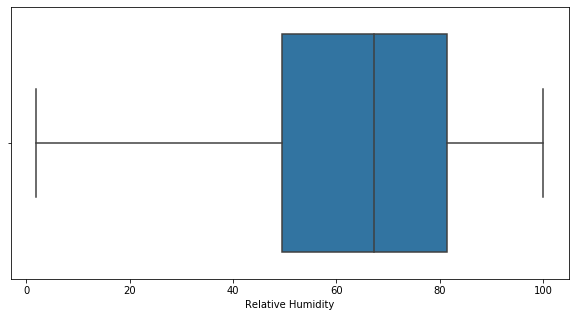

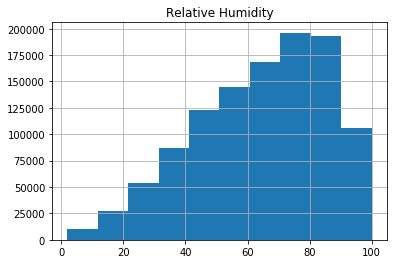

In [6]:
#L'unité de la variable Relative Humidity est: Pourcentage
print(df['Relative Humidity'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='Relative Humidity', data=df)
df.hist('Relative Humidity')

count    1.110138e+06
mean     8.771198e+00
std      5.713227e+00
min      0.000000e+00
25%      4.700000e+00
50%      8.100000e+00
75%      1.220000e+01
max      5.180000e+01
Name: Wind Speed, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E91073320>]],
      dtype=object)

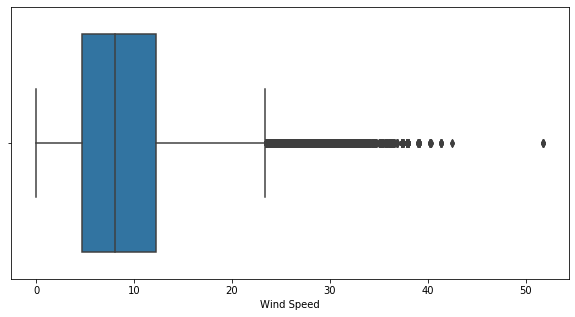

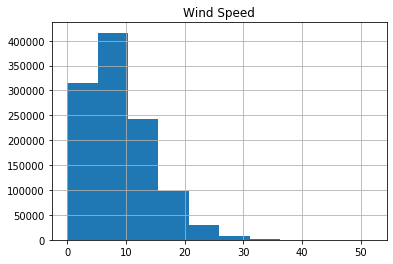

In [7]:
#L'unité de la variable Wind Speed est: miles par heure
print(df['Wind Speed'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='Wind Speed', data=df)
df.hist('Wind Speed')#0-10/10-20/20...

count    1.110138e+06
mean     5.466077e-03
std      3.883129e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.100000e+00
Name: Precipitation, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E912937F0>]],
      dtype=object)

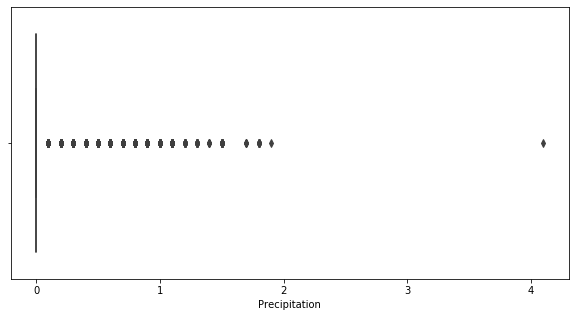

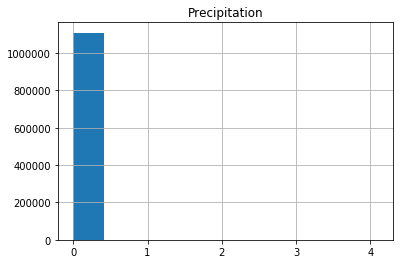

In [8]:
#L'unité de la variable Precipitation est: inch
print(df['Precipitation'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='Precipitation', data=df)#(1 inch = 2.54 cm)
df.hist('Precipitation')#0-0.3/0.3...

count    1.110138e+06
mean     1.085122e+01
std      3.110258e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: Precipitation Cover, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E91245630>]],
      dtype=object)

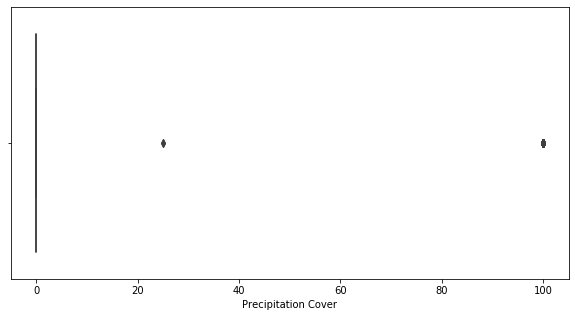

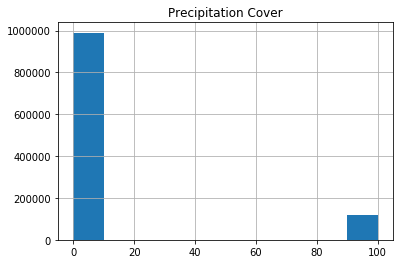

In [9]:
#L'unité de la variable Precipitation Cover est: pourcentage
print(df['Precipitation Cover'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='Precipitation Cover', data=df) 
df.hist('Precipitation Cover')#0-30/90-100

count    1.110138e+06
mean     9.361977e+00
std      4.882900e+00
min      0.000000e+00
25%      8.600000e+00
50%      1.000000e+01
75%      1.000000e+01
max      5.910000e+01
Name: Visibility, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E911C6390>]],
      dtype=object)

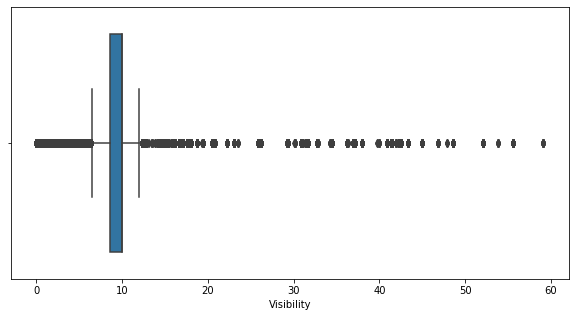

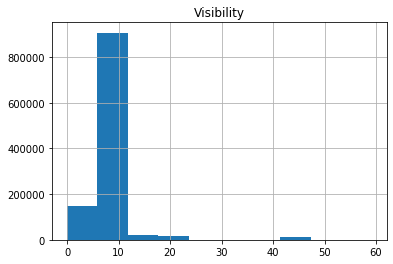

In [10]:
#L'unité de la variable Visibility est: miles
print(df['Visibility'].describe())

plt.figure(figsize=(10,5))
sns.boxplot(x='Visibility', data=df)
df.hist('Visibility')#0-7/7-12/12-23/23-41/41-60

# Data cleaning

In [11]:
# Convertion des numeros des jours en chaine de caractères
def numToday(x):
    if x==1:
        return "Monday"
    if x==2:
        return "Tuesday"
    if x==3:
        return "Wednesday"
    if x==4:
        return "Thursday"
    if x==5:
        return "Friday"
    if x==6:
        return "Saturday"
    if x==7:
        return "Sunday"

In [12]:
# Convertion des numeros des mois en chaine de caractères
def numToMonth(x):
    if x==1:
        return "January"
    if x==2:
        return "February"
    if x==3:
        return "March"
    if x==4:
        return "April"
    if x==5:
        return "May"
    if x==6:
        return "June"
    if x==7:
        return "July"
    if x==8:
        return "August"
    if x==9:
        return "September"
    if x==10:
        return "October"
    if x==11:
        return "November"
    if x==12:
        return "December"

In [13]:
df['DayOfWeek']= df['DayOfWeek'].apply(lambda x : numToday(x) )
df['Month']= df['Month'].apply(lambda x : numToMonth(x) )

# Calcul de la moyenne pour les variables SecurityDelay, CarrierDelay, NASDelay et génération des fichiers csv

In [14]:
def f(args):
    sigma=1
    NbreTotalDelignes=args.loc[:,'SecurityDelay'].value_counts().sum()
    nbreDeZeros=args.loc[:,'SecurityDelay'].value_counts()[0]
    nbreDeNonZeros=NbreTotalDelignes-nbreDeZeros
    return (args.loc[:,'SecurityDelay']).sum()/(nbreDeNonZeros+nbreDeZeros*sigma)

In [15]:
#Temps de retard moyen lié à la sécurité dans l'aéroport (SecurityDelay) par mois et par aéroport
resultat1=df.loc[:, ['Origin', 'Month','SecurityDelay']].groupby(['Month','Origin']).apply(f)
resultat1=pd.DataFrame(resultat1)
resultat1.columns=['SecurityDelayMean']
c= df['SecurityDelay'].value_counts()[0]#Nombre de zeros dans la colonne SecurityDelay
resultat1.to_csv('SecurityDelay.csv',index = True)
print(resultat1.query('Month=="January" and Origin == "IND"')['SecurityDelayMean'].values)
resultat1


[0.32449495]


SecurityDelayMean
Month     Origin                   
April     ATL              0.017601
          AUS              0.033025
          BNA              0.005176
          BOS              0.036723
          CLE              0.000000
          CLT              0.212775
          CVG              0.000000
          DAL              0.012170
          DCA              0.006596
          DEN              0.011571
          DFW              0.000000
          DTW              0.014623
          EWR              0.079265
          FLL              0.072575
          HOU              0.007498
          IAD              0.055228
          IAH              0.381553
          IND              0.040876
          JFK              0.031813
          LAS              0.098376
          LAX              0.020653
          LGA              0.000000
          MCI              0.002944
          MCO              0.201573
          MDW              0.040761
          MEM              0.000000
          MIA              0.034675
          MKE              0.000000
          MSP              0.002294
          OAK              0.050078
...                             ...
September EWR              0.037232
          FLL              0.027723
          HOU              0.000000
          IAD              0.328922
          IAH              0.144509
          IND              0.000000
          JFK              0.000000
          LAS              0.253691
          LAX              0.043139
          LGA              0.000000
          MCI              0.000000
          MCO              0.043561
          MDW              0.017212
          MEM              0.015025
          MIA              0.000000
          MKE              0.000000
          MSP              0.031670
          OAK              0.162338
          ORD              0.027821
          PDX              0.036082
          PHL              0.021842
          PHX              0.245940
          PIT              0.146552
          PWM              0.000000
          RDU              0.006878
          SAN              0.000000
          SEA              0.011247
          SFO              0.000000
          SLC              0.157967
          TPA              0.000000

[496 rows x 1 columns]

In [16]:
df_SD=df[df['SecurityDelay']>0]

In [17]:
#resultat=df.loc[:, ['Origin', 'Month','SecurityDelay']].groupby(['Month','Origin']).mean()
#resultat.columns=['SecurityDelayMean']
#resultat

In [18]:
#Temps de retard moyen lié à la compagnie (CarrierDelay) par mois et par compagnie

resultat2=df.loc[:, ['UniqueCarrier', 'Month','CarrierDelay']].groupby(['Month','UniqueCarrier']).mean()
resultat2.columns=['CarrierDelayMean']
resultat2['CarrierDelayMean']=resultat2['CarrierDelayMean']
resultat2.to_csv('CarrierDelay.csv',index = True)
b= df['CarrierDelay'].value_counts()[0]#Nombre de zeros dans la colonne CarrierDelay
resultat2

CarrierDelayMean
Month     UniqueCarrier                  
April     9E                    22.407739
          AA                    17.615483
          AS                    19.827113
          B6                    10.593526
          CO                    12.117173
          DL                    14.056402
          EV                    27.304348
          F9                    12.407843
          FL                     7.420792
          HA                    68.000000
          MQ                    16.534961
          NW                    19.346166
          OH                    19.075360
          OO                    16.739547
          UA                    13.500883
          US                    13.929194
          WN                    10.645246
          XE                    13.495170
          YV                    34.595532
August    9E                    20.255814
          AA                    18.971452
          AS                    16.053308
          B6                    20.800413
          CO                    14.517149
          DL                    16.331873
          EV                    37.977569
          F9                    13.784012
          FL                     8.999467
          HA                    36.098039
          MQ                    16.039359
...                                   ...
October   FL                     7.283035
          HA                    52.432099
          MQ                    18.882863
          NW                    18.894204
          OH                    18.835719
          OO                    12.353358
          UA                    15.437995
          US                    13.975920
          WN                    12.915862
          XE                    11.464036
          YV                    31.797768
September 9E                    23.792471
          AA                    18.727578
          AS                    20.995816
          B6                    12.483099
          CO                    17.904678
          DL                    12.573276
          EV                    33.818811
          F9                    13.377532
          FL                     8.010088
          HA                    73.318182
          MQ                    16.866042
          NW                    22.519586
          OH                    16.696546
          OO                    14.910973
          UA                    14.124732
          US                    13.414575
          WN                    11.537932
          XE                    16.166350
          YV                    32.604557

[230 rows x 1 columns]

,NASDelayMean
Hour,
1,7.846774
2,6.830508
3,7.650000
4,8.075145
5,18.367421
6,18.590126
7,18.551475
8,17.752660
9,17.019257


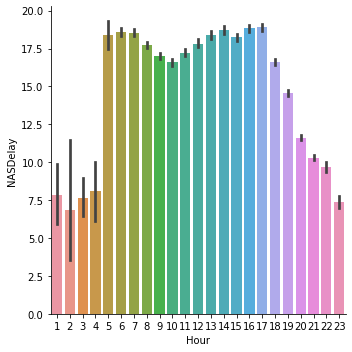

In [19]:
#Temps de retard moyen lié au système Américain (NASDelay) par heure

sns.catplot(x="Hour", y="NASDelay", data=df, kind="bar")
resultat3=df.loc[:, ['Hour','NASDelay']].groupby('Hour').mean()
resultat3.columns=['NASDelayMean']
resultat3['NASDelayMean']=resultat3['NASDelayMean']
resultat3.to_csv('NASDelay.csv',index = True)
#a= df['NASDelay'].value_counts()[0] #Nombre de zeros dans la colonne NASDelay
#print(a)
resultat3